<a href="https://colab.research.google.com/github/solharsh/ML_Repository_University_Of_Chicago_PGD/blob/master/Assignment5_DC_GS_CV_REG_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Decision Trees for Regression & Classification

## Question 1: Decision Trees for Regression
The dataset petrol_consumption.csvPreview the document file is taken from FSU dataset repository (http://people.sc.fsu.edu/~jburkardt/datasets/regression/x16.txt (Links to an external site.)).

For this dataset, use Decision Trees to try and predict gas consumption (in millions of gallons) in 48 US states based upon gas tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of the population with a driver license.

Use Decision Trees to build a regressor for the give data. Use Grid Search to find the optimal value for the hyperparameters, and evaluate your model on the appropriate metrics.

## Question 2: Decision Trees for Classification
The bill_authentication.csvPreview the document file is taken from UCI Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/banknote+authentication (Links to an external site.)).

Use this dataset to predict whether a bank note is authentic or fake depending upon the four different attributes of the image of the note. The attributes are Variance of wavelet transformed image, curtosis of the image, entropy, and skewness of the image.

Use Decision Trees to build a classifier for the give data. Use Grid Search to find the optimal value for the hyperparameters, and evaluate your model on suitable metrics. Use graphviz to visualize your decision tree.



In [0]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/UC Machine Learning/Datasets/petrol_consumption.csv")

In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


Here Petrol_Consumption is the Output variable and the others are predictor variables

In [5]:
df.shape

(48, 5)

In [6]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.drop("Petrol_Consumption", axis=1), df['Petrol_Consumption'], test_size = 0.2,\
random_state=10)
#Dropping 'Petrol Consumption' as its the output variable. Splitting the dataset in 80/20 Train and Test data.

Max_depth is one of the hyperparameter which gets defined before fitting the model. Here I'm considering it to be 3 initially


In [0]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth= 3)

In [12]:
tree.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [13]:
tree.feature_importances_

array([0.05467742, 0.25519308, 0.09942812, 0.59070138])

In [14]:
pd.Series(tree.feature_importances_, index=X_train.columns).sort_values(ascending = False)

Population_Driver_licence(%)    0.590701
Average_income                  0.255193
Paved_Highways                  0.099428
Petrol_tax                      0.054677
dtype: float64

This shows the order of feature importance. We can see population with driving license is the most important dictator of Petrol Consumption


In [0]:
predictions = tree.predict(X_test)

In [16]:
predictions[:5]

array([621.76923077, 560.81818182, 621.76923077, 529.66666667,
       460.57142857])

In [17]:
Y_test[:5]

35    644
23    547
42    632
40    587
45    510
Name: Petrol_Consumption, dtype: int64

From the above Y_test and Predictons, we can observe the difference in values. Looks like the predictions are not really great!

In [18]:
from sklearn.metrics import mean_absolute_error, r2_score

#I'll be using Mean Absolute Error and R2 Scores to check the performance of model.
mean_absolute_error(Y_test, predictions)

49.27156177156179

In [19]:
r2_score(Y_test, predictions)

0.5870667465795592

Therefore, it can be stated that model has a bad performance based on R2 Score. (Good model if R2 Score is closer to 1)


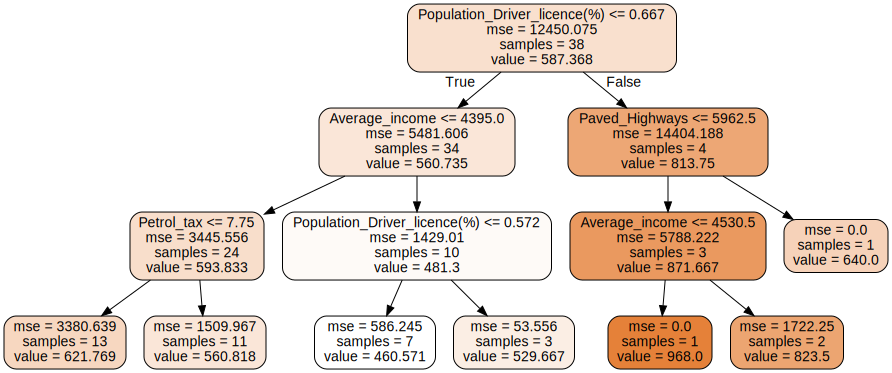

In [20]:
#Lets visualize the Decision Tree
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=X_train.columns, out_file=None)

import graphviz

graphviz.Source(dot_data)

Explaination:As we had already seen earlier, Population_Driver_License has the highest impact on petrol consumption. Therefore, the Tree starts from this parameter. The list of 38 States(Train dataset has 80% of 48 states) in USA are divided based on Population_Driver_License. If this value is less than or equal to 0.667, the model further divides based on Average_income. If its less than or equal to 4395.0, the model again checks if Petrol_tax is less than or equal to 7.75. Since we have reached the maximum depth (3), the further division stops.

In [21]:
import numpy as np

np.unique(predictions)

array([460.57142857, 529.66666667, 560.81818182, 621.76923077])

In order to improve the prediction and model performance, lets apply Grid Search method.


In [22]:
#Import GridSearchCV and fit the model to the training data.
from sklearn.model_selection import GridSearchCV
param_grid = [{"max_depth":[2,3,4,None], "max_features":[1, 2,3,4]}]

gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=10),\
                 param_grid = param_grid,\
                 cv=10)

gs.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=10, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [2, 3, 4, None],
                          'max_features': [1, 2, 3, 4]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

In [23]:
gs.cv_results_['params']

[{'max_depth': 2, 'max_features': 1},
 {'max_depth': 2, 'max_features': 2},
 {'max_depth': 2, 'max_features': 3},
 {'max_depth': 2, 'max_features': 4},
 {'max_depth': 3, 'max_features': 1},
 {'max_depth': 3, 'max_features': 2},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 4, 'max_features': 1},
 {'max_depth': 4, 'max_features': 2},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': None, 'max_features': 1},
 {'max_depth': None, 'max_features': 2},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4}]

In [24]:
gs.best_params_

{'max_depth': None, 'max_features': 3}

In [25]:
gs.cv_results_['rank_test_score']

array([14, 10,  9,  7,  8, 13, 12, 11, 16, 15,  2,  3,  4,  6,  1,  5],
      dtype=int32)

In [26]:
gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [0]:
predictions_new = gs.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error, r2_score

mean_absolute_error(Y_test, predictions_new)

r2_score(Y_test, predictions_new)

0.5044234715679189

Observation:

When evaluated earlier, we had the Mean Absolute Error 49.2 and R2 Score 0.58. In order to improve the model, we had opted to use Grid Search method. However, looking at the new R2 Score, it can be said that the model isn't performing well with Grid Search (R2 Score and error scores have increased).

Therefore, lets try using other methods like Random Forest to predict.

# Applying Random Forest Regression to Predict Better

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=250, n_jobs=-1)

rf_model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
predictions_rf = rf_model.predict(X_test)

In [31]:
mean_absolute_error(Y_test, predictions_rf)

32.096799999999995

In [32]:
r2_score(Y_test, predictions_rf)

0.7377431690098494

Therefore, it can be observed that Random Forest performs better over Decision Tree, Grid Search with the given dataset by looking at the R2 Score and Error. (Error decreased and R2 score increased)

# Question 2: Decision Trees for Classification

Use this dataset to predict whether a bank note is authentic or fake depending upon the four different attributes of the image of the note. The attributes are Variance of wavelet transformed image, curtosis of the image, entropy, and skewness of the image. Use Decision Trees to build a classifier for the give data. Use Grid Search to find the optimal value for the hyperparameters, and evaluate your model on suitable metrics. Use graphviz to visualize your decision tree.


In [0]:
import pandas as pd

df2 = pd.read_csv("/content/drive/My Drive/UC Machine Learning/Datasets/bill_authentication.csv")

In [36]:
df2.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [37]:
df2.shape

(1372, 5)

In [0]:
from sklearn.model_selection import train_test_split

#The output variable is 'Class'. Hence, dropping it and splitting the given dataset.
X_train, X_test, Y_train, Y_test = train_test_split(df2.drop("Class", axis=1), df2['Class'], test_size = 0.2,\
random_state=4)

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)

tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predictions = tree.predict(X_test)

In [41]:
predictions[:5]

array([0, 0, 1, 0, 0])

Please note: 0 represents Good notes, 1 Represents Faulty notes

In [42]:
Y_test[:5]

409     0
75      0
1183    1
70      0
372     0
Name: Class, dtype: int64

I'd like to use Accuracy Scores and Confusion Matrix to guage the performance of the model.

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(Y_test, predictions)

0.9345454545454546

In [44]:
accuracy_score(Y_test, predictions, normalize=False)

257

In [0]:
confusion_mat = confusion_matrix(Y_test, predictions)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

confusion_df = pd.DataFrame(confusion_mat, index=['Predicted Real Notes','Predicted Fake Notes'],\
                            columns=['Actual Real Notes','Actual Real Fake'])

In [53]:
confusion_df

,Actual Real Notes,Actual Real Fake
Predicted Real Notes,148,10
Predicted Fake Notes,8,109






The Accuracy Score seems to be good. Following analysis can be drawn from the confustion matrix.

Out of the 275(total instances in Test dataset -> 20% original dataset), the model could accurately predict 257 (148 + 109) times correctly.

-> 148 Times, the notes were actual notes and the model has predicted it to be Actual notes. (Good)

-> 10 Times, the notes were actually faulty, but the model has predicted it to be real notes. (Bad)

-> 8 Times, the notes are actually real notes that model predicted to be fake. (Bad)

-> 109 Times, the notes were actually faulty and the model has predicted them fake. (Good)


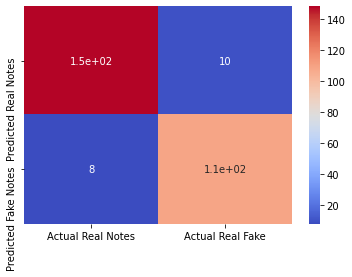

In [54]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

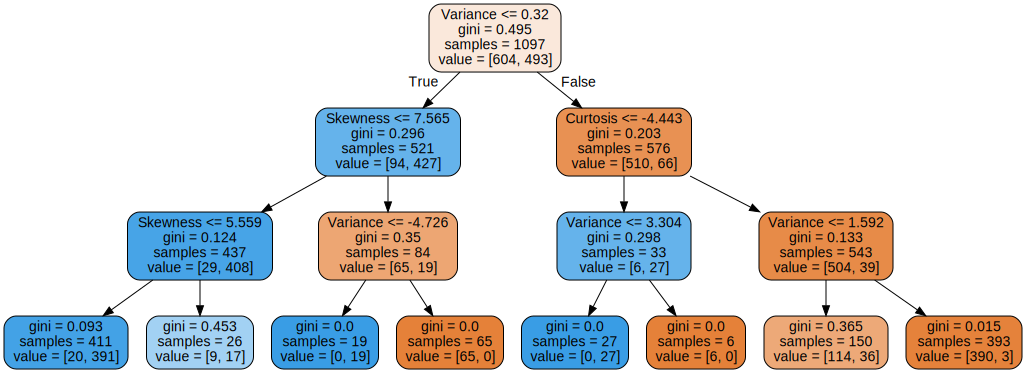

In [55]:
#Visualizing the Tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=X_train.columns, out_file=None)

graphviz.Source(dot_data)

In [56]:
#Further Trying to improve the model's performance with Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = [{"max_depth":[2,3,4,None], "max_features":[1,2,3,4]}]

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=4),\
                 param_grid = param_grid,\
                 cv=10)

gs.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=4, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [2, 3, 4, None],
                          'max_features': [1, 2, 3, 4]}],
            

In [57]:
gs.cv_results_['params']

[{'max_depth': 2, 'max_features': 1},
 {'max_depth': 2, 'max_features': 2},
 {'max_depth': 2, 'max_features': 3},
 {'max_depth': 2, 'max_features': 4},
 {'max_depth': 3, 'max_features': 1},
 {'max_depth': 3, 'max_features': 2},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 4, 'max_features': 1},
 {'max_depth': 4, 'max_features': 2},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': None, 'max_features': 1},
 {'max_depth': None, 'max_features': 2},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4}]

In [58]:
gs.best_params_

{'max_depth': None, 'max_features': 4}

In [59]:
gs.cv_results_['rank_test_score']

array([15, 16, 10, 10, 14, 12,  8,  8, 13,  5,  7,  6,  4,  2,  3,  1],
      dtype=int32)

In [60]:
gs.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4, splitter='best')

In [0]:
predictions_new = gs.predict(X_test)

In [0]:
confusion_mat = confusion_matrix(Y_test, predictions_new)
confusion_df = pd.DataFrame(confusion_mat, index=['Predicted Real Notes','Predicted Fake Notes'],\
                            columns=['Actual Real Notes','Actual Fake Notes'])

In [63]:
confusion_df

,Actual Real Notes,Actual Fake Notes
Predicted Real Notes,157,1
Predicted Fake Notes,0,117


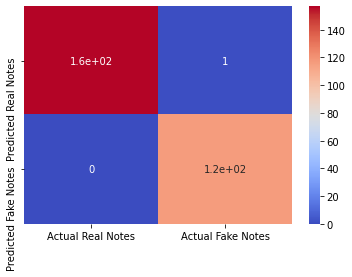

In [64]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

In [65]:
accuracy_score(Y_test, predictions_new)

0.9963636363636363

In [66]:
accuracy_score(Y_test, predictions_new, normalize=False)

274

Observation:
- 1.It can be clearly seen based on the Accuracy Score, the model is performing with 99.63% efficiency with Grid Search method. With the improvements, the model can predict 274 times correctly out of 275 instances. From the confustion matrix, it can be observed that the model fails only once in finding the Fake notes as Real Notes. 
- 2.In the Question1, Grid Search failed to improve the Decision Tree regression model. However, in the Question2, Grid Search helped increasing prediction success rate of the Decision Tree Classification model. 